First include libraries needed for this miniProject.
1. PIL i.e. Python Imaging Library to read and resize train and test images,
2. matplitlib.pyplot for ploting,
3. numpy for matrix manipulation,
4. os for operating system operations and
4. keras for neural network.

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
#paths to find train and test data
train_hand_dir = '/home/jayraj/Desktop/No_mouse_mouse/data_Set/dummy/train/hand/'
train_non_hand_dir = '/home/jayraj/Desktop/No_mouse_mouse/data_Set/dummy/train/non_hand/'
test_hand_dir = '/home/jayraj/Desktop/No_mouse_mouse/data_Set/dummy/test/hand/'
test_non_hand_dir = '/home/jayraj/Desktop/No_mouse_mouse/data_Set/dummy/test/non_hand/'

#get data set count
train_hand_sample = len(os.listdir(train_hand_dir))
train_non_hand_sample =len(os.listdir(train_non_hand_dir)) 
test_hand_sample = len(os.listdir(test_hand_dir))
test_non_hand_sample = len(os.listdir(test_non_hand_dir))

print("Train Set samples- HAND-"+str(train_hand_sample)+" NON_HAND-"+str(train_non_hand_sample))
print("Test Set samples- HAND-"+str(test_hand_sample)+" NON_HAND-"+str(test_non_hand_sample))

Train Set samples- HAND-82 NON_HAND-75
Test Set samples- HAND-9 NON_HAND-8


In [3]:
train_x_data_set=np.zeros([train_hand_sample+train_non_hand_sample,100,100,3])
print("shape of training data set: "+ str(train_x_data_set.shape))

shape of training data set: (157, 100, 100, 3)


In [4]:
#load images containing hand in train_x_data_set matrix
for index,filename in enumerate(os.listdir(train_hand_dir)):
    img = Image.open(train_hand_dir+filename)
    img = img.resize((100,100),Image.ANTIALIAS)
    im = np.array(img)
    train_x_data_set[index,:,:,:]=im

In [5]:
#load images that does not contain hand in train_x_data_set matrix
for index,filename in enumerate(os.listdir(train_non_hand_dir)):
    img = Image.open(train_non_hand_dir+filename)
    img = img.resize((100,100),Image.ANTIALIAS)
    im=np.array(img)
    train_x_data_set[train_hand_sample+index,:,:,:]=im

In [6]:
train_x_data_set = train_x_data_set/255
print(train_x_data_set)

[[[[ 0.39215686  0.6         0.60784314]
   [ 0.4         0.59215686  0.60784314]
   [ 0.4         0.58823529  0.60392157]
   ..., 
   [ 0.40392157  0.51764706  0.57254902]
   [ 0.40784314  0.51372549  0.57254902]
   [ 0.4         0.50196078  0.56470588]]

  [[ 0.37254902  0.58039216  0.58431373]
   [ 0.38431373  0.58039216  0.59215686]
   [ 0.39215686  0.58039216  0.59215686]
   ..., 
   [ 0.4         0.52156863  0.58039216]
   [ 0.40784314  0.52941176  0.58823529]
   [ 0.41568627  0.52941176  0.59215686]]

  [[ 0.4         0.61176471  0.61568627]
   [ 0.40784314  0.60784314  0.61960784]
   [ 0.40784314  0.59607843  0.61176471]
   ..., 
   [ 0.39607843  0.51372549  0.56862745]
   [ 0.40392157  0.51372549  0.57647059]
   [ 0.40784314  0.51764706  0.58039216]]

  ..., 
  [[ 0.41176471  0.61568627  0.67843137]
   [ 0.41960784  0.61960784  0.67843137]
   [ 0.43137255  0.62352941  0.68235294]
   ..., 
   [ 0.22745098  0.30980392  0.31764706]
   [ 0.17647059  0.37254902  0.47843137]
   [ 0.

In [7]:
train_y_data_set=np.array([])

In [8]:
train_y_data_set=np.append(np.append(train_y_data_set,[1]*train_hand_sample),[0]*train_non_hand_sample)
print("shape of train label:"+str(train_y_data_set.shape))
print(train_y_data_set)

shape of train label:(157,)
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


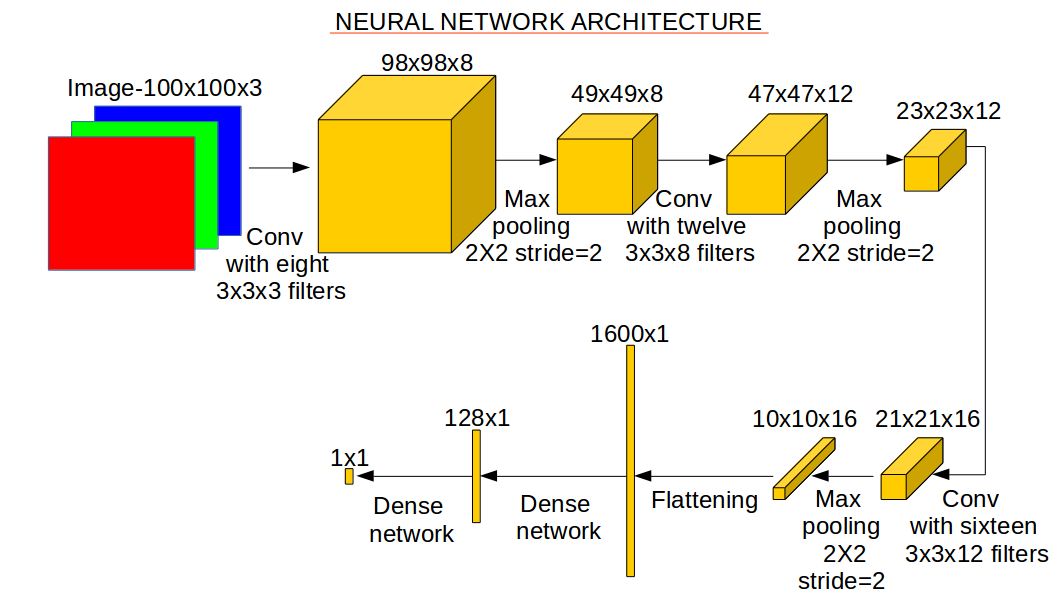
Final number gives us probablity of image belonging to class 1.
'Relu' activation function used except for output layer where 'sigmoid' activation function is used.

In [9]:
model = Sequential()
model.add(Conv2D(8,(3,3),input_shape=(100,100,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(12,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(train_x_data_set,train_y_data_set,epochs=50)

Epoch 1/50
157/157 [==============================] - 2s 13ms/step - loss: 0.7166 - acc: 0.4713
Epoch 2/50
157/157 [==============================] - 1s 8ms/step - loss: 0.6860 - acc: 0.4777
Epoch 3/50
157/157 [==============================] - 1s 7ms/step - loss: 0.6553 - acc: 0.6688
Epoch 4/50
157/157 [==============================] - 1s 8ms/step - loss: 0.6302 - acc: 0.6943
Epoch 5/50
157/157 [==============================] - 1s 9ms/step - loss: 0.6602 - acc: 0.5669
Epoch 6/50
157/157 [==============================] - 1s 8ms/step - loss: 0.6310 - acc: 0.6624
Epoch 7/50
157/157 [==============================] - 1s 9ms/step - loss: 0.6071 - acc: 0.6497
Epoch 8/50
157/157 [==============================] - 1s 7ms/step - loss: 0.5905 - acc: 0.6688
Epoch 9/50
157/157 [==============================] - 1s 7ms/step - loss: 0.5744 - acc: 0.6943
Epoch 10/50
157/157 [==============================] - 1s 7ms/step - loss: 0.5679 - acc: 0.6688
Epoch 11/50
157/157 [===========================

In [12]:
test_x_data_set=np.zeros([test_hand_sample+test_non_hand_sample,100,100,3])
test_file_list = []

In [13]:
for index,filename in enumerate(os.listdir(test_hand_dir)):
    img = Image.open(test_hand_dir+filename)
    test_file_list.append(filename)
    img = img.resize((100,100),Image.ANTIALIAS)
    im = np.array(img)
    test_x_data_set[index,:,:,:]=im

In [14]:
for index,filename in enumerate(os.listdir(test_non_hand_dir)):
    img = Image.open(test_non_hand_dir+filename)
    test_file_list.append(filename)
    img = img.resize((100,100),Image.ANTIALIAS)
    im = np.array(img)
    test_x_data_set[test_hand_sample+index,:,:,:]=im

In [15]:
test_x_data_set = test_x_data_set/255

In [16]:
test_y_data_set=np.array([])
test_y_data_set=np.append(np.append(test_y_data_set,[1]*test_hand_sample),[0]*test_non_hand_sample)

In [17]:
model.evaluate(test_x_data_set,test_y_data_set)

17/17 [==============================] - 0s 6ms/step


[0.24424222111701965, 0.88235294818878174]

In [18]:
import timeit
%time predictions=model.predict(test_x_data_set)

CPU times: user 224 ms, sys: 4 ms, total: 228 ms
Wall time: 122 ms


In [19]:
for filename,predict in zip(test_file_list,predictions):
    print(filename+"-->"+str(predict))

t_frame0014.jpg-->[ 0.45177066]
1_frame0004.jpg-->[ 0.98144794]
t_frame0036.jpg-->[ 0.99956304]
t_frame0048.jpg-->[ 0.99680978]
1_frame0040.jpg-->[ 0.99047756]
t_frame0017.jpg-->[ 0.76117331]
1_frame0009.jpg-->[ 0.93965125]
1_frame0025.jpg-->[ 0.16561018]
1_frame0043.jpg-->[ 0.75191885]
t_frame0037.jpg-->[ 0.32885852]
1_frame0000.jpg-->[ 0.1003756]
1_frame0037.jpg-->[ 0.10997311]
frame0009.jpg-->[  5.51885706e-17]
t_frame0028.jpg-->[ 0.02747949]
t_frame0010.jpg-->[ 0.22762516]
frame0003.jpg-->[  1.79547987e-05]
frame0010.jpg-->[  4.49190720e-15]


In [20]:
model.save('/home/jayraj/Desktop/No_mouse_mouse/model/hand_detect_24_feb.model')